Importing Libraries

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

Reading Data

In [3]:
df=pd.read_csv("D:/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape


(150, 5)

Preprocessing of Data

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking For Null Values

In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

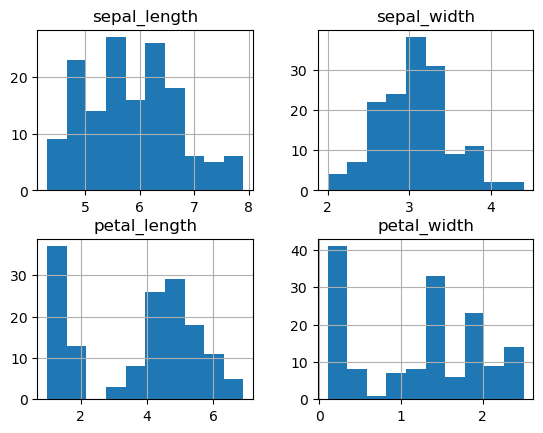

In [7]:
df.hist()

<Axes: >

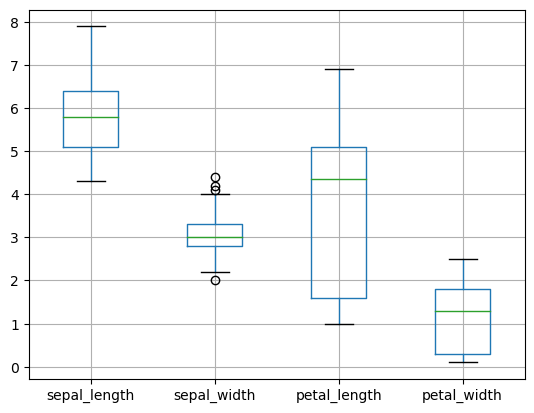

In [8]:
df.boxplot(column=['sepal_length','sepal_width','petal_length','petal_width'])


Removing Outliers

In [9]:
# IQR
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
lower_arr = np.where(df['sepal_width']<=lower)[0]
upper_arr = np.where(df['sepal_width']>=upper)[0]

In [10]:
df.shape

(150, 5)

In [11]:
#removing null values
df.drop(index=lower_arr, inplace=True)
df.drop(index=upper_arr, inplace=True)

In [12]:
df.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[146 rows x 5 columns]>

<Axes: >

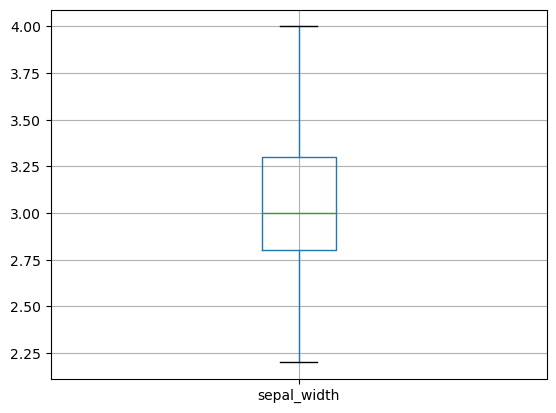

In [13]:
df.boxplot(column=['sepal_width'])

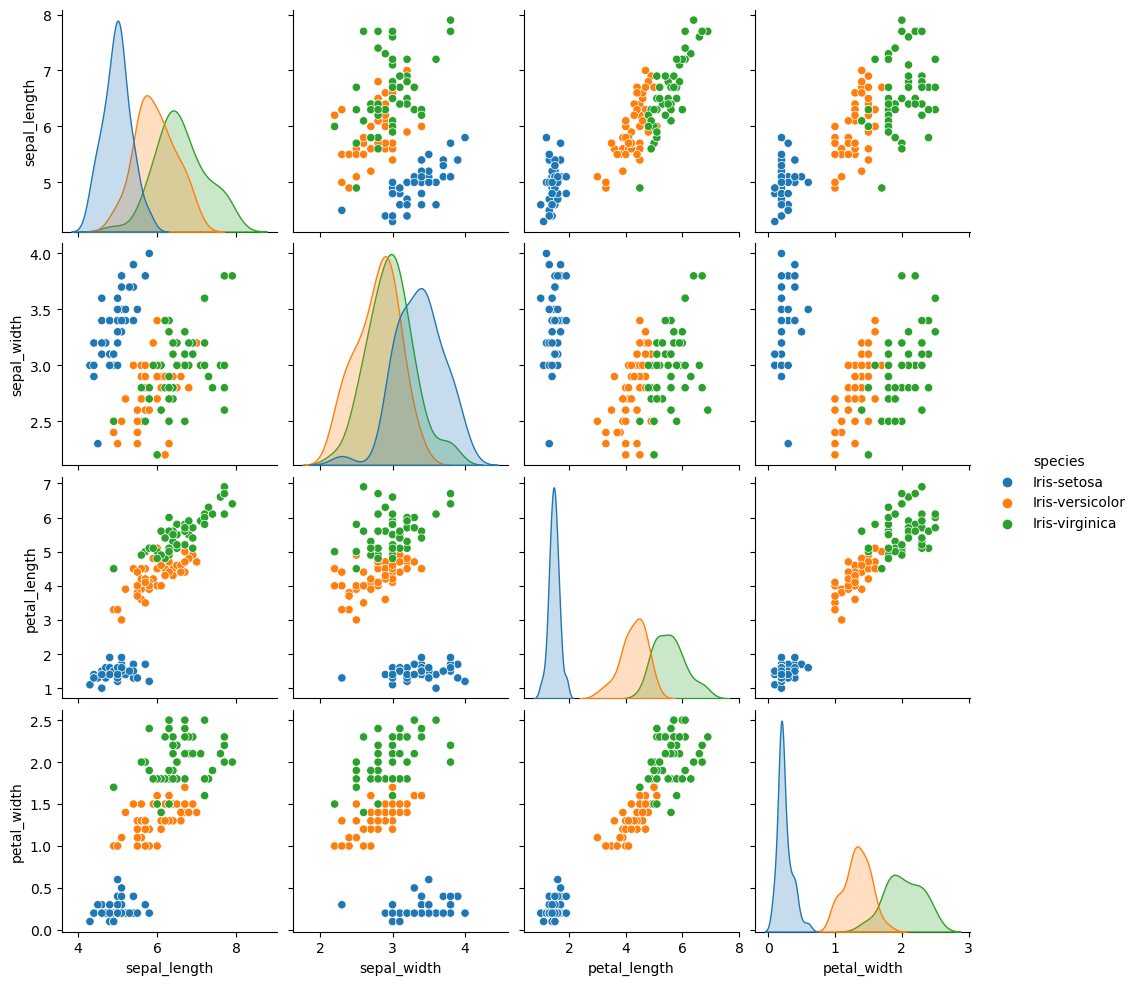

In [14]:
sns.pairplot(df,hue='species')

C:\Users\adity\AppData\Local\Temp\ipykernel_13604\1112500214.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

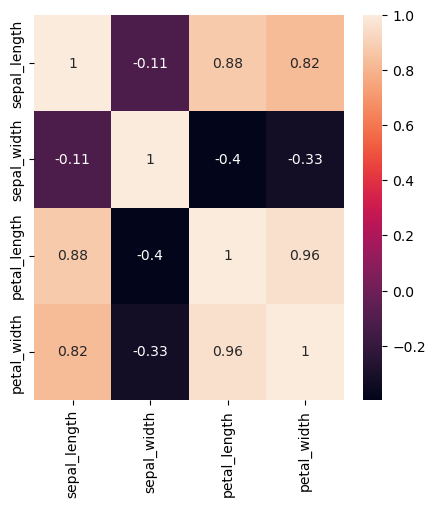

In [15]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True)

Splitting up data

In [16]:
x=df.drop('species', axis=1)
y=df['species']
x,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [146 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: speci

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42,test_size=0.25)

Deploying ML models

In [28]:
#logisticregression
mod=LogisticRegression()
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
a=100*metrics.accuracy_score(pred,y_test)
print('Accuracy : ',a)

Accuracy :  94.5945945945946


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
#KNN
mod3=KNeighborsClassifier(n_neighbors=5)
mod3.fit(x_train,y_train)
pred_y1=mod3.predict(x_test)
c=100*metrics.accuracy_score(y_test,pred_y)
print('Accuracy : ',c)

Accuracy :  94.5945945945946


In [30]:
#decision tree classifier
mod5=DecisionTreeClassifier(criterion='entropy')
mod5.fit(x_train,y_train)
pred_y3=mod5.predict(x_test)
e=100*metrics.accuracy_score(y_test,pred_y)
print('Accuracy : ',e)

Accuracy :  94.5945945945946


In [33]:
result=pd.DataFrame({'Model':['Logistic Regression','KNN','Decision Tree'],
                     'Score':[a,c,e]})
df1 = result.sort_values(by='Score', ascending=True)\
             .set_index('Score')
df1.head()

,Model
Score,
94.594595,Logistic Regression
94.594595,KNN
94.594595,Decision Tree


In [35]:
print(pred)

['Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']
